# Finding the Best Two Markets to Advertise In
We're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
data.head()

C:\Users\yuanl\AppData\Local\Temp\ipykernel_26068\3287649139.py:1: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Sample Representativity

In [3]:
# Remove the data without jobrole interest

data_job_clean = data.dropna(subset='JobRoleInterest') 
data_job_clean.shape

(6992, 136)

In [4]:
# Web or Mobile interest

web_mobile_p = data_job_clean['JobRoleInterest'].str.contains(r'Web|Mobile').sum() / data_job_clean.shape[0]*100
print('The percent of people who are interested in Web or Mobile Development: {:.1f}%.'.format(web_mobile_p))   

The percent of people who are interested in Web or Mobile Development: 86.3%.


People who are interested in Web or Mobile development accounts for 86.3% of the people who have specific interested roles

In [5]:
# Web or Mobile interest

web_count = 0
for item in data_job_clean['JobRoleInterest']:
    if 'Web' in item or 'Mobile' in item:
        web_count += 1
print('The percent of people who are interested in Web or Mobile Development: ', web_count/data_job_clean.shape[0]*100)   

The percent of people who are interested in Web or Mobile Development:  86.29862700228833


### Number of subjects people are interested in 

In [6]:
len_count = {}
for item in data_job_clean['JobRoleInterest'].str.split(','):
    if len(item) in len_count:
        len_count[len(item)] += 1
    else:
        len_count[len(item)] = 1
    


In [7]:
len_count

{1: 2213,
 5: 842,
 3: 1111,
 6: 470,
 4: 1064,
 2: 761,
 12: 21,
 7: 270,
 8: 123,
 10: 33,
 9: 69,
 11: 13,
 13: 2}

In [8]:
len_count = {}
for item in data_job_clean['JobRoleInterest'].str.split(','):
    if len_count.get(len(item), False):
        len_count[len(item)] += 1
    else:
        len_count[len(item)] = 1
    

In [9]:
data_n_subject = pd.DataFrame.from_dict(len_count, orient='index') # key is the index
data_n_subject['Percent'] = data_n_subject/ data_n_subject.sum()*100

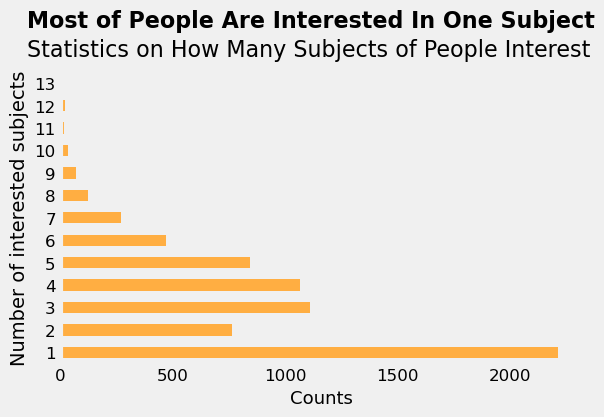

In [10]:
style.use('fivethirtyeight')

data_n_subject = pd.DataFrame.from_dict(len_count, orient='index') # key is the index
data_n_subject['Percent'] = data_n_subject/ data_n_subject.sum()*100

fig, ax = plt.subplots(figsize=(6, 3.6))


data_n_subject.iloc[:, 0].sort_index().plot.barh(legend=False, ax=ax, color='#ffae42')


ax.text(-150, 14.5, 'Most of People Are Interested In One Subject', weight='bold', fontsize=16)
ax.text(-150, 13.2, 'Statistics on How Many Subjects of People Interest', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Counts', fontsize=13)
plt.ylabel('Number of interested subjects', fontsize=14)
plt.show()

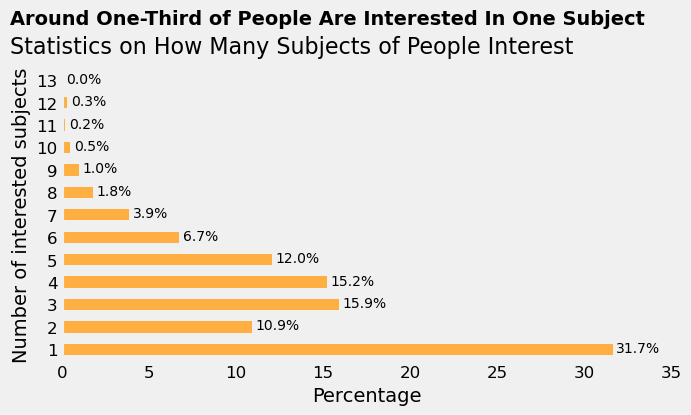

In [11]:
# Present in terms of fractions
style.use('fivethirtyeight')
data_s_p = data_n_subject.iloc[:, 1].sort_index()


fig, ax = plt.subplots(figsize=(7, 3.6))
ax.grid(False)

ax = data_s_p.plot.barh(legend=False, ax=ax, color='#ffae42')
ax.set_xticks(range(0, 36,5))

ax.text(-3, 14.5, 'Around One-Third of People Are Interested In One Subject', weight='bold', fontsize=14)
ax.text(-3, 13.2, 'Statistics on How Many Subjects of People Interest', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.xlabel('Counts', fontsize=13)
plt.ylabel('Number of interested subjects', fontsize=13)

ax.set_xticklabels(['0', '5', '10', '15', '20', '25', '30', '35'])
ax.set_xlabel('Percentage',  fontsize=14)
ax.set_ylabel('Number of interested subjects', fontsize=14)

for num, per in data_s_p.items():
    ax.text(per+0.2, num-1.25, str(round(per,1))+'%', ha='left', va='bottom', size=10)
plt.show()

In [12]:
len_count

{1: 2213,
 5: 842,
 3: 1111,
 6: 470,
 4: 1064,
 2: 761,
 12: 21,
 7: 270,
 8: 123,
 10: 33,
 9: 69,
 11: 13,
 13: 2}

31.7% of the surveyed people are interested in one position. People who are intersted in 3 or 4 positions range from 15% and 16%.People who are interested in 2 or 5 positions between 10 and 12%. Very few people are interested in more than 8 positions. 

### Locations and Densities

In [13]:
# The number of people from different countries
location_abs = data_job_clean['CountryLive'].value_counts().sort_values(ascending=False)
location_abs.head(5)

CountryLive
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: count, dtype: int64

In [14]:
# The percent of people from different countries
location_fre = data_job_clean['CountryLive'].value_counts(normalize=True).sort_values(ascending=False)*100
location_fre.head(5)

CountryLive
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: proportion, dtype: float64

45.7% people live in US. Countries with above 2% from India (7.7%), UK (4.6%) and Canada (3.8%). The percent of people from each of other countries is below 2%. Therefore, US and India is two main markets for advertising. We still needs to know how many people are willing to take the onlien courses.

### Spending Money for Learning

In [15]:
# Money spend per month
data_s = data_job_clean.copy()
data_s['MonthsProgramming'].replace(0, 1, inplace=True)
data_s['Money_month'] = data_s['MoneyForLearning'] / data_s['MonthsProgramming'] 

In [16]:
# Clean the null values in country live and money spend per month
data_s_clean = data_s.dropna(subset=['CountryLive', 'Money_month'])
data_s_c = data_s_clean[data_s_clean['CountryLive'].str.contains(r'United States of America|United Kingdom|India|Canada')]

# Get the average money spent per month for people in different countries
data_s_c.groupby('CountryLive')['Money_month'].agg([ 'size', np.mean, np.median, np.max, np.min, np.std])

,size,mean,median,amax,amin,std
CountryLive,,,,,,
Canada,240,113.510961,0.000000,5000.0,0.0,441.014158
India,463,135.100982,0.000000,10000.0,0.0,692.960378
United Kingdom,279,45.534443,0.000000,1400.0,0.0,162.311836
United States of America,2933,227.997996,3.333333,80000.0,0.0,1940.245614


People from United States has the highest average money spent \$228, while United Kindom the lowest \$45.5. 
Canada and Indian people spend roughly \$120 per month. The median value is 0 for Canada, India, and United Kindom and 3.3 for United States of America. 

### Dealing with Extreme Outliers

C:\Users\yuanl\AppData\Local\Temp\ipykernel_26068\2684799374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_c.loc[:, 'Money_month_log'] = np.log10(data_s_c["Money_month"]+1) # create a log column


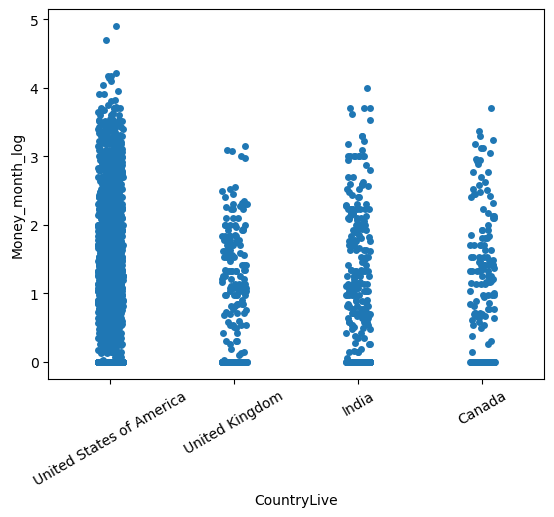

In [17]:
# Box plot to check the outliers

style.use('default')
data_s_c.loc[:, 'Money_month_log'] = np.log10(data_s_c["Money_month"]+1) # create a log column

np.log10(data_s_c["Money_month"]+1)
sns.stripplot(x='CountryLive', y='Money_month_log', data=data_s_c) 
plt.xticks(rotation=30)
plt.show()

In [18]:
# People from different countries

data_s_c.groupby('CountryLive').size().sort_values(ascending=False)

CountryLive
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
dtype: int64

In [19]:
data_s_c.groupby('CountryLive').size()

CountryLive
Canada                       240
India                        463
United Kingdom               279
United States of America    2933
dtype: int64

* The money spent per month ranges from 0 to 1e3 or 1 e4. The higher expense could be because of other factors such as attending the camp. 
* Let's draw the figure considering the attended camp and months programming. 

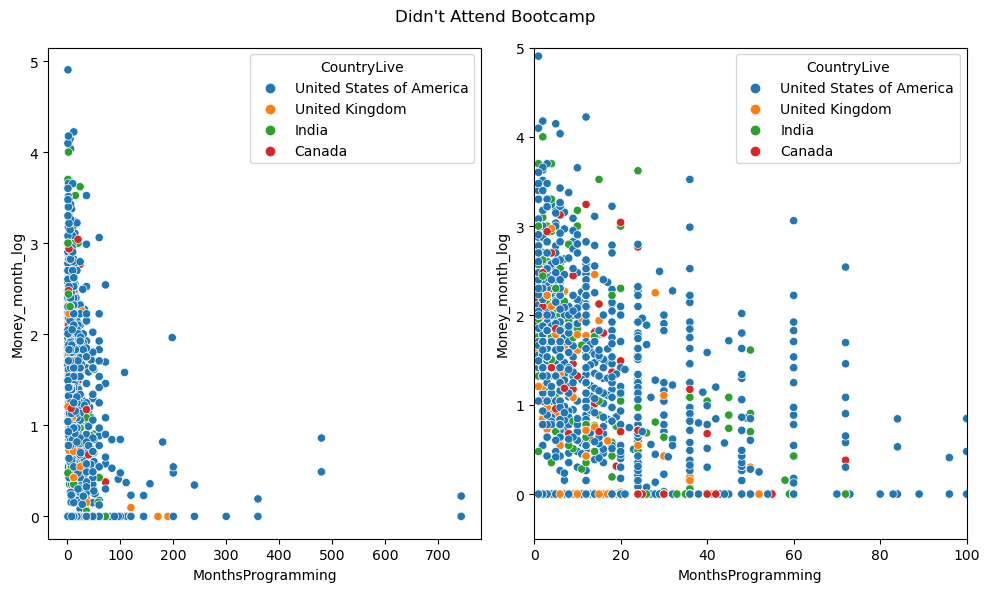

In [20]:
# Money_month_log and didn't attend camp

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

data_m_n = data_s_c[data_s_c['AttendedBootcamp']==0]

plt.subplot(1, 2, 1)
sns.scatterplot(data=data_m_n, x='MonthsProgramming', y='Money_month_log',  hue='CountryLive')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data_m_n, x='MonthsProgramming', y='Money_month_log',  hue='CountryLive')

plt.xlim([0,100])
plt.ylim([-0.5,5])

plt.suptitle('Didn\'t Attend Bootcamp')
plt.tight_layout()

plt.show()

Text(0.5, 0.98, 'Attended Bootcamp')

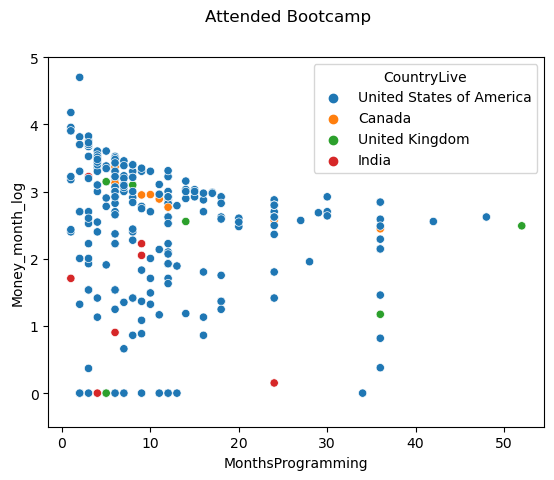

In [21]:
# Money_month_log and Attended camp

data_m_y = data_s_c[data_s_c['AttendedBootcamp']==1]

sns.scatterplot(data=data_m_y, x='MonthsProgramming', y='Money_month_log',  hue='CountryLive')
plt.ylim([-0.5,5])
plt.suptitle('Attended Bootcamp')

In [22]:
data_s_c.groupby('CountryLive')['AttendedBootcamp'].sum().sort_values(ascending=False)

CountryLive
United States of America    239.0
Canada                        9.0
India                         7.0
United Kingdom                7.0
Name: AttendedBootcamp, dtype: float64

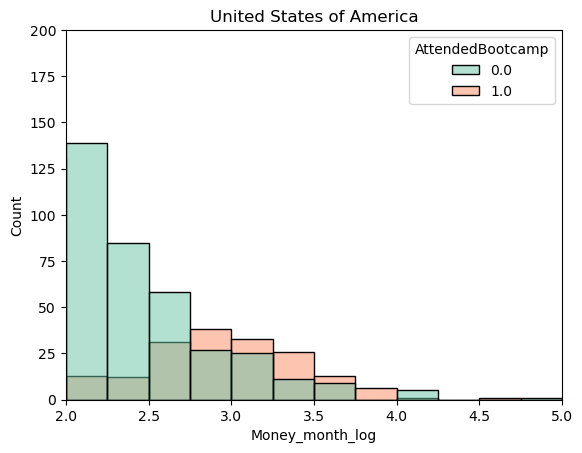

In [23]:
# United States of America histpplot

sns.histplot(data = data_s_c.loc[data_s_c['CountryLive']=='United States of America'], x='Money_month_log', 
             hue='AttendedBootcamp', palette="Set2", binwidth=0.25) 
plt.xlim([2, 5])
plt.ylim([0, 200])
plt.title('United States of America')

plt.show()


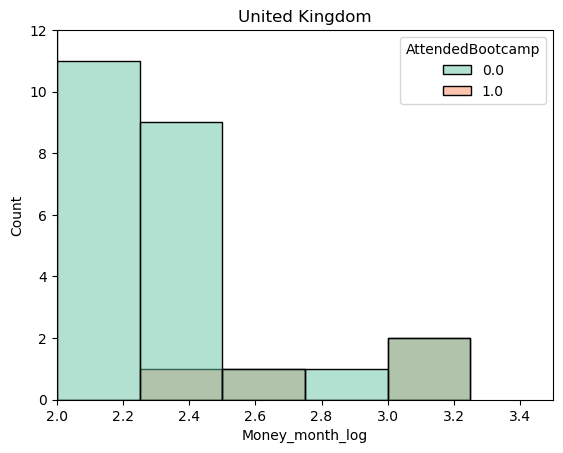

In [24]:
# United Kingdom histpplot

sns.histplot(data = data_s_c.loc[data_s_c['CountryLive']=='United Kingdom'], x='Money_month_log', 
             hue='AttendedBootcamp', palette="Set2", binwidth=0.25)   

plt.xlim([2, 3.5])
plt.ylim([0, 12])
plt.title('United Kingdom')
plt.show()


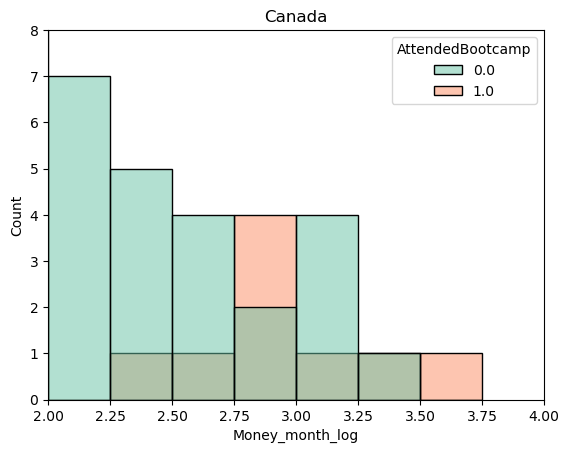

In [25]:
# Canada histpplot

sns.histplot(data = data_s_c.loc[data_s_c['CountryLive']=='Canada'], x='Money_month_log', 
             hue='AttendedBootcamp', palette="Set2", binwidth=0.25)   



plt.xlim([2, 4])
plt.ylim([0, 8])
plt.title('Canada')
plt.show()


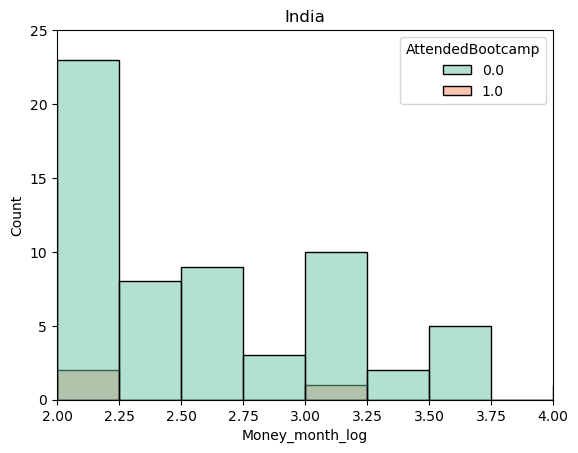

In [26]:
# India histpplot

sns.histplot(data = data_s_c.loc[data_s_c['CountryLive']=='India'], x='Money_month_log', 
             hue='AttendedBootcamp', palette="Set2", binwidth=0.25)   

plt.xlim([2, 4])
plt.ylim([0, 25])
plt.title('India')
plt.show()

* Rule out those who attended the bootcamp and spent more 1e2 for each country. 

In [27]:
mask = data_s_c[ (data_s_c['Money_month_log'] > 2.75) &(data_s_c['AttendedBootcamp']==1) ].index
data_clean = data_s_c.drop(mask)
data_clean.groupby('CountryLive')['Money_month'].agg([np.mean, 'size']).sort_values('mean', ascending=False)

,mean,size
CountryLive,,
United States of America,132.558644,2815
India,131.785905,462
Canada,66.211078,233
United Kingdom,36.296425,277


United States of America and India are good markets to invest in as they are more willing to spend more money for web and mobile development courses. Besides, those two countries have larger markets.